Memory usage (traced): 45.56 MB

 [04:39:36PM - eval_waveform_func_fit]:  Getting 1400 waveforms for 6.00 OV [0:2048] 


IntProgress(value=0, bar_style='info', description='Fitting waveforms', layout=Layout(width='100%'), max=1400)

<Figure size 432x288 with 0 Axes>

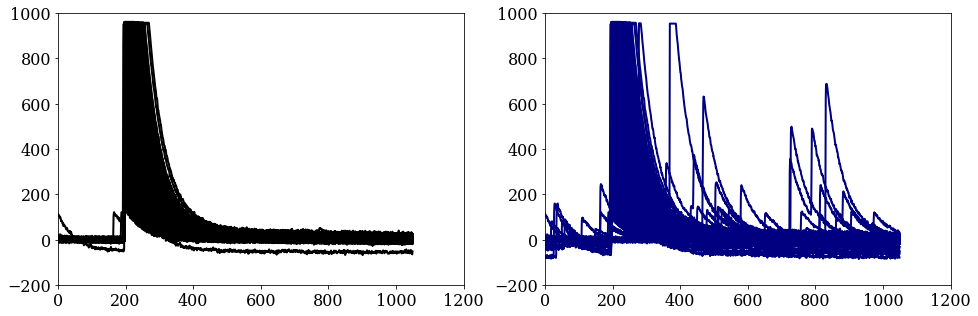

 [04:40:01PM - __resolve_wf_fit_params]:  Found tau 61.470014655593545 us to get from 466.5824821250611 to 171.64610278455197. Using 1400 waveforms for 6.00 OV. Tau-ind-est is 120 waveform indexes 
 [04:40:01PM - __resolve_wf_fit_params]:  Double 40 (2.857142857142857%), late 1 (0.07142857142857142%) out of 1400 waveforms. 
Will fit with [193.26529750854908, 336.7673955631399, -1.6521711035267366, 1] and tau final 61.470014655593545
336.40139556313994
0
Value at tau: 336.40139556313994 for tau 1 and peak 317.32836309423874
[196.73539892 324.47062479   0.76367099   0.42461459]


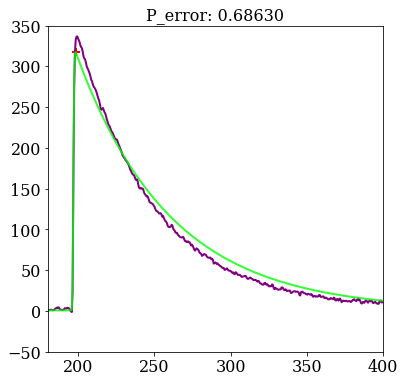

Will fit with [192.75304738641915, 142.1327638225256, -0.7030695108077349, 1] and tau final 61.470014655593545
86.1027638225256
0
Value at tau: 86.1027638225256 for tau -2 and peak 132.6707503209353
[196.5713831  136.74293734  -0.92767191   0.4412205 ]


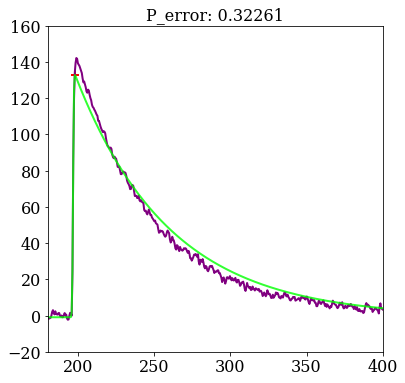

Will fit with [192.75304738641915, 458.957452559727, -0.976091884717484, 1] and tau final 61.470014655593545
458.957452559727
1
Value at tau: 458.957452559727 for tau 2 and peak 434.8737171834907
[196.47093909 445.02542449   1.03606257   0.48700867]


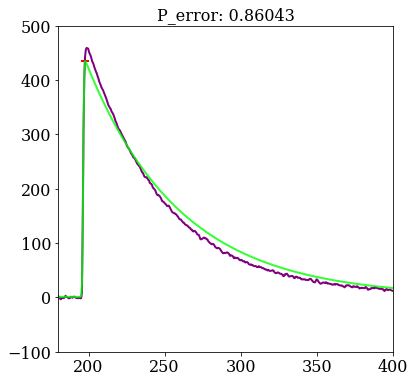

Will fit with [192.75304738641915, 141.27485870307166, -0.48980796359499595, 1] and tau final 61.470014655593545
130.65485870307165
0
Value at tau: 130.65485870307165 for tau -1 and peak 132.48966256944843
[196.27620614 136.16255994  -0.43559875   0.43738283]


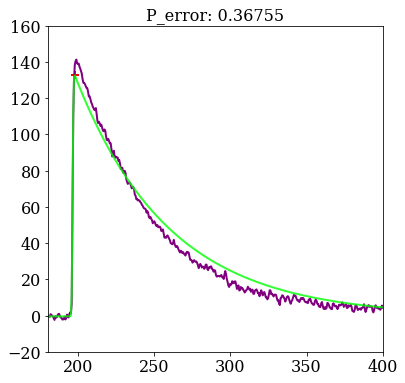

Will fit with [194.289797752809, 139.08868395904437, 1.2575617368221468, 1] and tau final 61.470014655593545
131.39768395904437
0
Value at tau: 131.39768395904437 for tau -1 and peak 131.7893802631875
[196.61960915 135.82325667  -0.45250714   0.48023204]


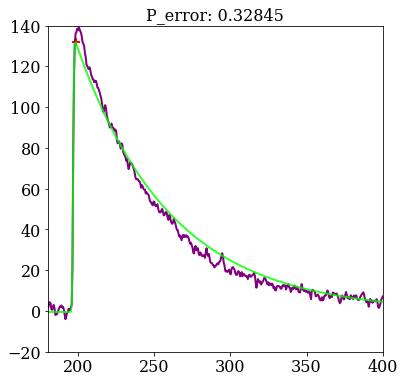

Will fit with [207.6083009281876, 335.80674129692835, 0.601185741372772, 1] and tau final 61.470014655593545
335.80674129692835
1
Value at tau: 335.80674129692835 for tau 4 and peak 298.4647260298193
[200.0653296  376.43576578   2.24335198   6.80864298]


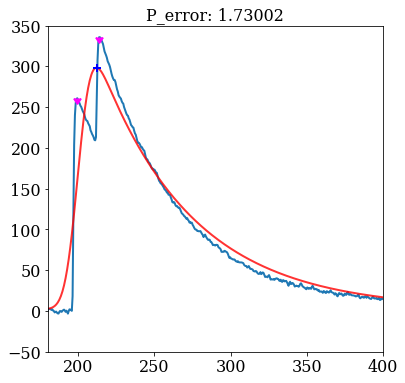

Will fit with [193.26529750854908, 141.84837064846417, -0.4993515737580619, 1] and tau final 61.470014655593545
109.37737064846417
-1
Value at tau: 109.37737064846417 for tau -2 and peak 132.94408577063297
[196.79233941 137.22773508  -0.98265801   0.45855275]


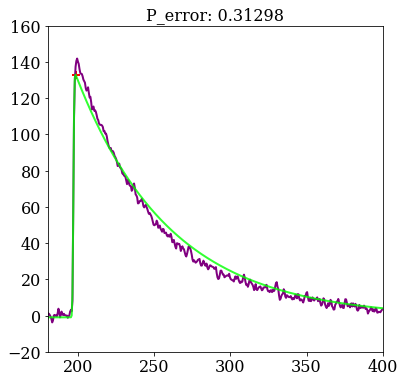

Will fit with [192.2407972642892, 143.42915699658704, 0.7964903299203656, 1] and tau final 61.470014655593545
128.65815699658705
0
Value at tau: 128.65815699658705 for tau -1 and peak 133.6665885230678
[196.34789352 137.59990003  -0.70094899   0.45865369]


In [1]:
# IMPORTS
import glob, os, sys
import numpy as np
sys.path.insert(0,'../../')
sys.path.insert(0,'/Library/TeX/texbin/')
sys.path.insert(0,'../../WaveformAnalysis')
#from Gat import Gat
from Gat_HPC import Gat_HPC as Gat

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

# DATA SOURCE
#path = r'/home/tb829/sipm_data/202206[0-1]*/'
path = r'/Users/tizi/Documents/YALE_WL.nosync/data/202206[0-1]*/'

gat2 = Gat(path, 'wave*',6.0,debug=False,notify=False)
#20.8 MB vs 216 KB

2048


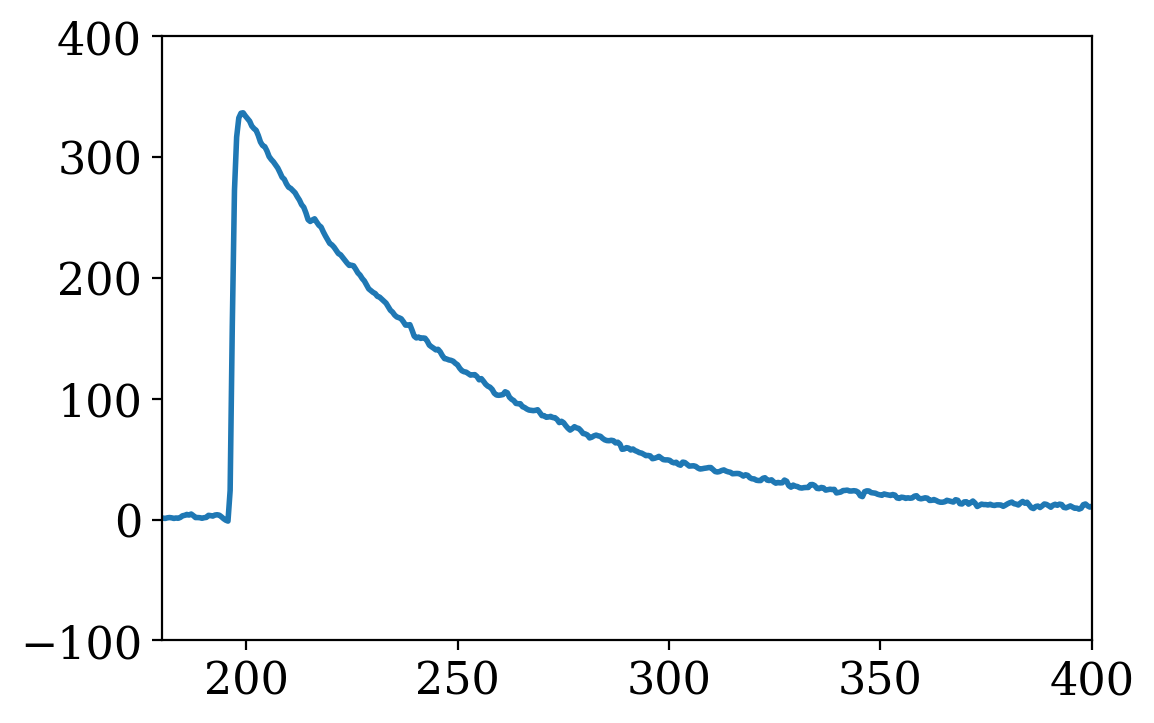

In [9]:
print(len(gat2.SiPM.Ch[0].Time))

time = gat2.SiPM.Ch[0].Time
wave = gat2.SiPM.Ch[0].Amp[0]

from matplotlib import pyplot as plt

peak_x_ind = np.argmax(wave)
peak_A = wave[peak_x_ind]
peak_x = time[peak_x_ind]
fall_value = (peak_A)*(np.e**-1)
tau_ind = np.where(wave[peak_x_ind:] < fall_value)[0][0]
tau_est = np.abs(time[tau_ind] - time[peak_x_ind])
value_at = wave[peak_x_ind+tau_ind]
tau_est = time[tau_ind]
tau_ind_est = int(np.abs(peak_x_ind-tau_ind)/(1/(gat2.SiPM.sampling_freq/1000000)))

plt.plot(time,wave)
plt.xlim(180,400)
plt.show()
print()

In [ ]:
NO_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/NO_FIELD/'
POS_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/POS_FIELD/'
NEG_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/NEG_FIELD/'

#gat = Gat(NO_FIELD,'mca_keith',31.00,debug=False,force=True,notify=False,data_type=Gat.MCA)

In [ ]:
#gat.eval_gain(31.00,total_bins=9,min=4)

In [ ]:
#gat.mca_gain_corrected()

In [ ]:
gat2 = Gat(path, 'wave*',7,debug=False,notify=False)

In [ ]:
gat2.eval_waveform_func_fit()
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
gat2.eval_gain(5.00,plot=False,find_best=True,fix_params=True)

In [ ]:
gat2.plot(hist=True)
gat2.plot(hist=True,gain=False,hist_fit=True)
gat2.plot(hist=True,gain=True,hist_fit=True)
gat2.plot(hist=True,gain=True,hist_fit=False)
gat2.plot(gain=True)

In [ ]:
print(1/gat2.SiPM.sampling_freq)
/print(gat2.SiPM.Ch[0].Time[1]-gat.SiPMs[5.00].Ch[0].Time[0]) #TIME IN MICROSECONDS IF USING .TIME